<a href="https://colab.research.google.com/github/nnilocoelho/computer-vision-ocr/blob/main/aps_vc_matheus_nilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **DETECÇÃO E EXTRAÇÃO DE TEXTO COM RECONHECIMENTO ÓTICO DE CARACTERES (OCR) UTILIZANDO PYTESSERACT**

Alunos: Matheus Alborgueti e Nilo J Coelho Neto

#### Principais objetivos


*   Processamento de imagens utilizando algoritmos de visão computacional e IA.
*   Detecção e extração de texto com reconhecimento óptico de caracteres - OCR

#### Etapas para a Extração e Reconhecimento OCR:
* Aquisição da imagem
* Pré-processamento
* Reconhecimento de texto
* Reconhecimento de padrões
* Detecção de recursos
* Pós-processamento

#### TESSERACT | PYTESSERACT 

Python-tesseract é uma ferramenta de reconhecimento óptico de caracteres (OCR) para python.

Ou seja, ele irá reconhecer e “ler” o texto embutido nas imagens. Python-tesseract é um wrapper para o Tesseract-OCR Engine do Google.

Também é útil como um script de invocação independente para tesseract, pois pode ler todos os tipos de imagem suportados pelas bibliotecas de imagens Pillow e Leptonica, incluindo jpeg, png, gif, bmp, tiff e outros. Além disso, se usado como um script, o Python-tesseract imprimirá o texto reconhecido em vez de gravá-lo em um arquivo.

Referência: https://pypi.org/project/pytesseract/

In [1]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow # para mostrar as imagens no Google Colab

##### AQUISIÇÃO DE IMAGENS - LEITURA - TESTES INICIAIS OCR

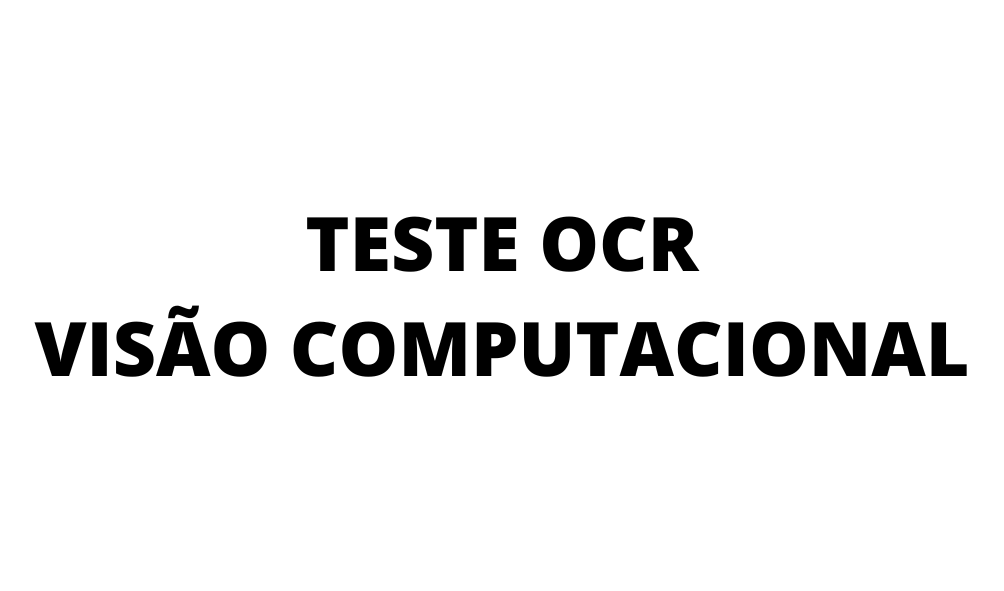

In [3]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/teste-ocr.png')
cv2_imshow(img)

In [4]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE OCR
VISAO COMPUTACIONAL



#### AQUISIÇÃO DE IMAGENS | IMAGENS BGR 

No OpenCV os canais de cores são invertidos, então para utilizarmos a biblioteca precisamos fazer a conversão de BGR para RGB.

Existem outros tipos de conversões que podem ser feitas, conforme a lista que podemos encontrar na documentação oficial da biblioteca.

[Documentação Oficial OpenCV:](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

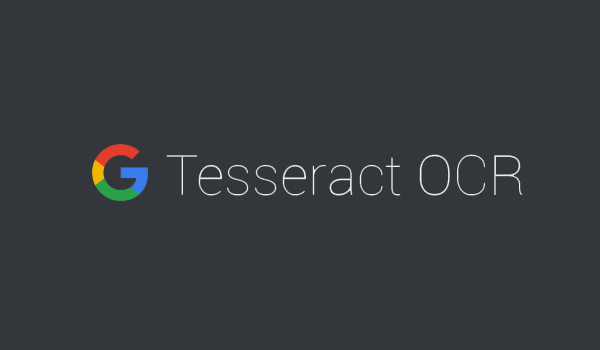

In [5]:
#IMAGEM BGR
tesseract_ocr = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/tesseract.png')
cv2_imshow(tesseract_ocr)

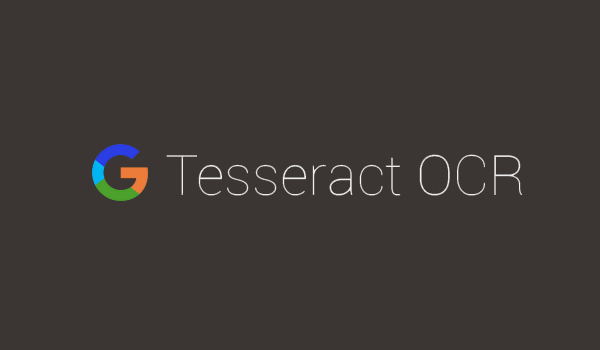

In [6]:
# CONVERSÃO DE IMAGEM PARA RGB
rgb = cv2.cvtColor(tesseract_ocr, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

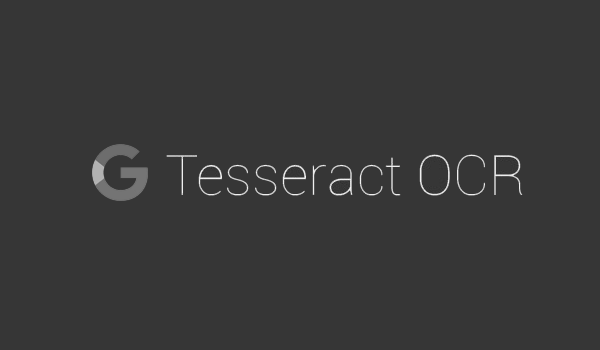

In [7]:
# CONVERSÃO DE IMAGEM PARA CINZA
gray = cv2.cvtColor(tesseract_ocr, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#### EXTRAÇÃO DE TEXTO | IMAGENS CONVERTIDAS

- Extração dos textos efetuado com sucesso.

In [10]:
# RGB
texto = pytesseract.image_to_string(rgb)
print(texto)

G Tesseract OCR



In [11]:
# CINZA
texto = pytesseract.image_to_string(gray)
print(texto)

G Tesseract OCR



#### EXEMPLO 2 | PLACA DE TRANSITO

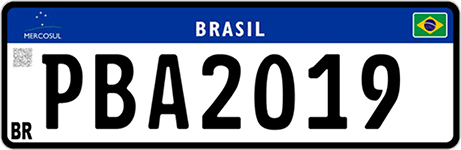

In [12]:
placa = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/placa-mercosul.png')
cv2_imshow(placa)

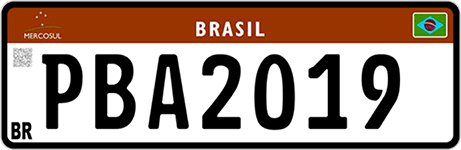

In [13]:
# CONVERSÃO DE IMAGEM PARA RGB
rgb_placa = cv2.cvtColor(placa, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_placa)

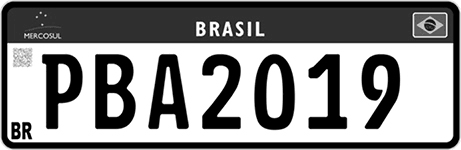

In [14]:
# CONVERSÃO DE IMAGEM PARA CINZA
gray_placa = cv2.cvtColor(placa, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_placa)

#### EXMPLO 2 | EXTRAÇÃO DE TEXTO | IMAGENS CONVERTIDAS

- Execução efetuada com sucesso porém a extração de texto não foi efetuada conforme exemplos anteriores.

- Para melhorar a extração de textos utilizamos a biblioteca de idiomas do Tesseract a biblioteca Tessadata, utilizada para segmentar e melhorar as extrações de textos.

In [58]:
# RGB - SEM SAIDA DE TEXTO
texto_placa = pytesseract.image_to_string(rgb_placa)
print(texto_placa)

In [59]:
# GRAY - SEM SAIDA DE TEXTO
texto_placa = pytesseract.image_to_string(gray_placa)
print(texto_placa)

#### EXEMPLO 3 | EXTRAÇÃO DE TEXTOS | CARACTERES

- Extração do texto efetuada com sucesso porém algumas palavras não foram identificas de forma correta.

- Utilização da biblioteca de idiomas tessadata para segmentar e extrair o texto conforme idioma padrão configurado.

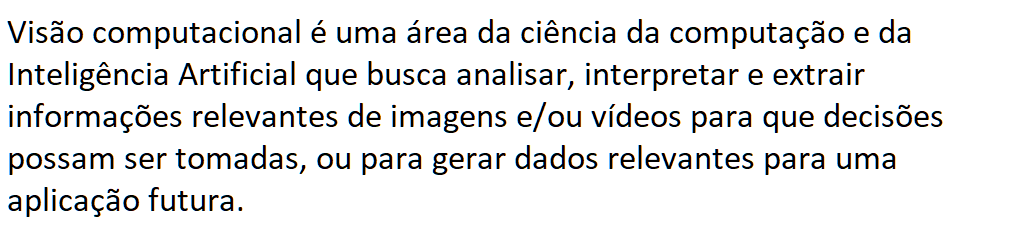

In [20]:
# LEITURA DA IMAGEM E CONVERSÃO BGR-RGB
caracteres = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/aps-texto-ocr.png')
rgb = cv2.cvtColor(caracteres, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [21]:
# SAIDA DE TEXTO - CARACTERES ESPECIAIS NÃO IDENTIFICADOS
texto_caracteres = pytesseract.image_to_string(rgb)
print(texto_caracteres)

Visao computacional é uma area da ciéncia da computac¢ao e da
Inteligéncia Artificial que busca analisar, interpretar e extrair
informacées relevantes de imagens e/ou videos para que decisées
possam ser tomadas, ou para gerar dados relevantes para uma
aplicagdo futura.



#### CARACTERES ESPECIAIS NÃO IDENTIFICADOS
As palavras da lista abaixo, não foram extraidas de forma eficiente.

* **visão, área, ciência, computação, inteligência, informações, decisões,aplicação.**


In [22]:
# Instalação do Tesseract OCR Português
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-por all 4.00~git24-0e00fe6-1.2 [856 kB]
Fetched 856 kB in 1s (1,015 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 123989 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-por (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-por (4.00~git24-0e00fe6-1.2) ...


In [23]:
# Listar linguas do Tesseract
!tesseract --list-langs

List of available languages (3):
por
osd
eng


In [24]:
# Texto extraido conforme configuração do idioma.
texto_caracteres = pytesseract.image_to_string(rgb, lang='por')
print(texto_caracteres)

Visão computacional é uma área da ciência da computação e da
Inteligência Artificial que busca analisar, interpretar e extrair
informações relevantes de imagens e/ou vídeos para que decisões
possam ser tomadas, ou para gerar dados relevantes para uma
aplicação futura.



#### TESSDATA | MODELOS TREINADOS

In [26]:
# CRIAÇÃO DO DIRETORIO
!mkdir tessdata
!ls tessdata/

In [27]:
# MODELOS TREINADOS - POR | ENG
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2022-11-11 12:22:41--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-11-11 12:22:41--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2022-11-11 12:22:41--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

#### MODELOS DE SEGMENTAÇÃO

In [28]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


##### CONFIGURAÇÕES SEGMENTADAS

- 1 TEXTO
- 2 PLACA RGB
- 3 PLACA GRAY

In [30]:
# 1 Configuração padrão
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Visão computacional é uma área da ciência da computação e da
Inteligência Artificial que busca analisar, interpretar e extrair
informações relevantes de imagens e/ou vídeos para que decisões
possam ser tomadas, ou para gerar dados relevantes para uma
aplicação futura.



In [31]:
# 2 - PSM 6 = bloco de texto uniforme
config_tesseract = '--tessdata-dir tessdata --psm 6' 
texto_placa = pytesseract.image_to_string(rgb_placa, lang='por', config=config_tesseract)
print(texto_placa)

PBA2019



In [32]:
# 3 - PSM 9 = tratamento da imagem como uma unica palavra.
config_tesseract = '--tessdata-dir tessdata --psm 9'
texto_placa = pytesseract.image_to_string(gray_placa, lang='por', config=config_tesseract)
print(texto_placa)

 PBA2019



#### SELEÇÃO DE TEXTOS

- SELEÇÃO | SEGMENTAÇÃO | EXTRAÇÃO DO TEXTO

In [34]:
import re
from pytesseract import Output

#### EXEMPLO 1 | PLACA PADRÃO MERCOSUL

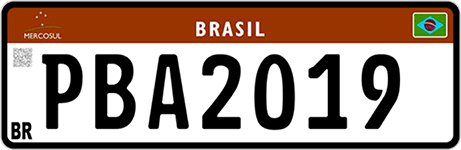

In [35]:
# CONVERSÃO DE IMAGEM PARA RGB
rgb_placa = cv2.cvtColor(placa, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_placa)

In [36]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
resultado = pytesseract.image_to_data(rgb_placa, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 11, 11, 11, 11],
 'top': [0, 14, 14, 14, 14],
 'width': [461, 435, 435, 435, 435],
 'height': [150, 125, 125, 125, 125],
 'conf': ['-1', '-1', '-1', '-1', 15],
 'text': ['', '', '', '', 'PBA2019']}

In [37]:
min_conf = 0 #@param {type: 'slider', min: 0, max: 100}

In [38]:
def caixa_texto(resultado, rgb_placa, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(rgb_placa, (x, y), (x+w, y+h), cor, 2)

  return x, y, rgb_placa

In [39]:
len(resultado['text'])

5

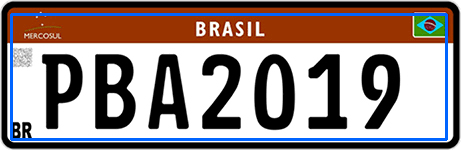

In [40]:
img_copia = rgb_placa.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, rgb_placa = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

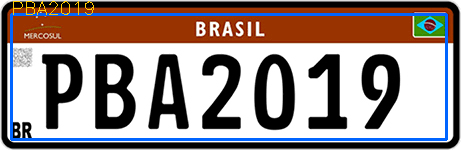

In [47]:
img_copia = rgb_placa.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 0), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,200,255))

cv2_imshow(img_copia)

#### EXEMPLO 2 

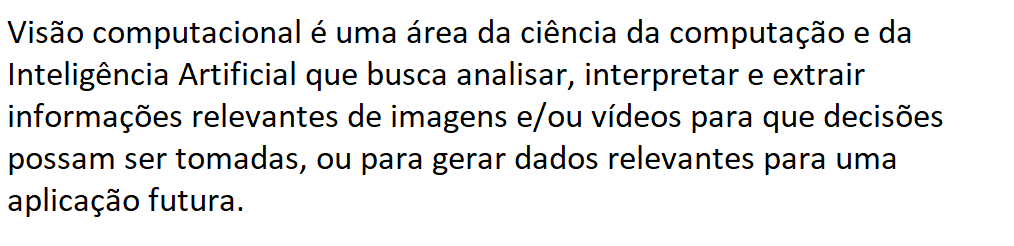

In [48]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/aps-texto-ocr.png')
cv2_imshow(img)

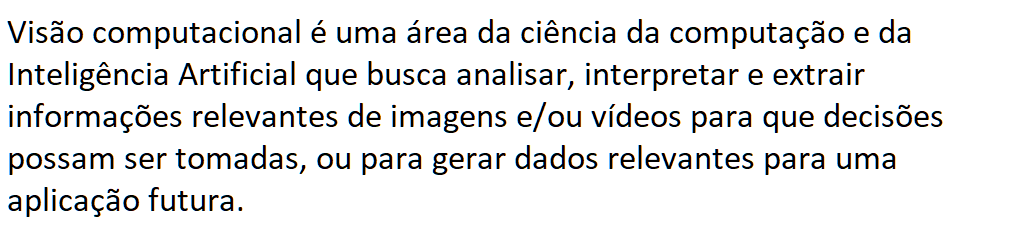

In [49]:
# CONVERSÃO DE IMAGEM PARA RGB
rgb_ocr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_ocr)

In [50]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
resultado = pytesseract.image_to_data(rgb_ocr, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [51]:
min_conf = 0 #@param {type: 'slider', min: 0, max: 100}

In [52]:
def caixa_texto(resultado, rgb_ocr, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(rgb_ocr, (x, y), (x+w, y+h), cor, 2)

  return x, y, rgb_ocr

In [53]:
len(resultado['text'])

48

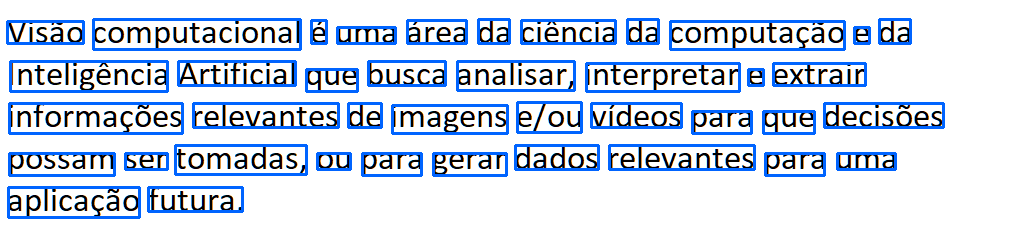

In [54]:
img_copia = rgb_ocr.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, rgb_ocr = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

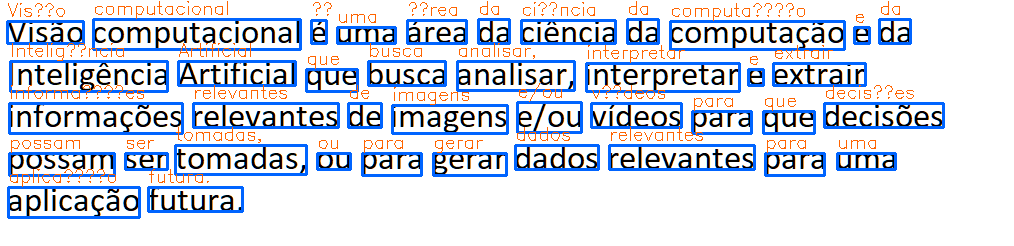

In [55]:
img_copia = rgb_ocr.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,100,255))

cv2_imshow(img_copia)

#### EXEMPLO 3 | IMAGEM NATURAL

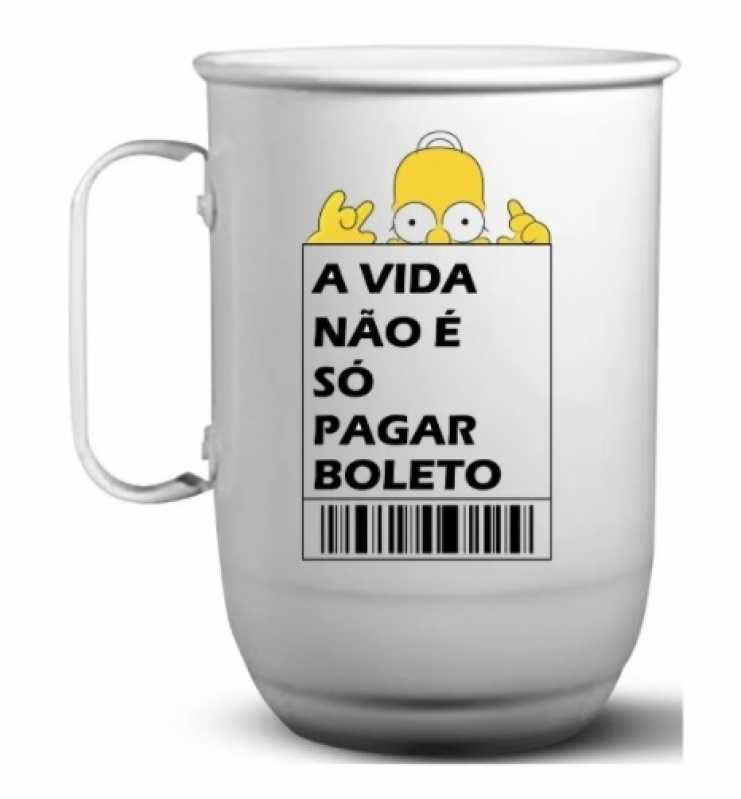

In [ ]:
capa_agenda = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/caneca-aluminio-personalizada-valor.jpg')
cv2_imshow(capa_agenda)

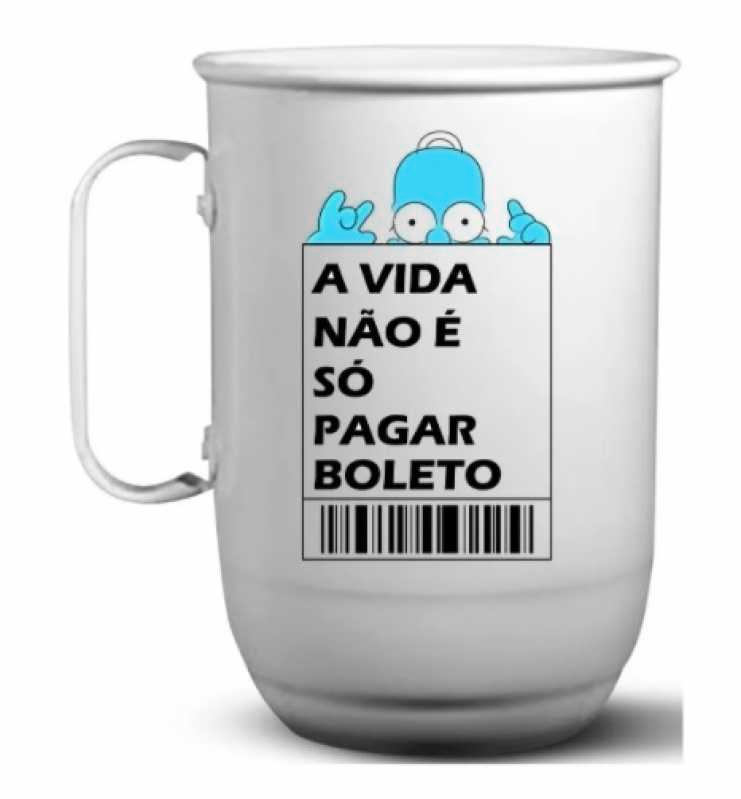

In [ ]:
# CONVERSÃO DE IMAGEM PARA RGB
rgb_capa = cv2.cvtColor(capa_agenda, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_capa)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
resultado = pytesseract.image_to_data(capa_agenda, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'line_num': [0,
  0,
  0,
  1,
  1,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  6,
  6,
  7,
  7,
  7,
  8,
  8,
  8,
  9,
  9,
  9,
  9],
 'word_num': [0,
  0,
  0,
  0,
  1,
  0,
  1,
  2,
  0,
  1,
  2,
  0,
  1,
  2,
  0,
  1,
  2,
  3,
  0,
  1,
  0,
  1,
  2,
  0,
  1,
  2,
  0,
  1,
  2,
  3],
 'left': [0,
  121,
  121

In [ ]:
min_conf = 4 #@param {type: 'slider', min: 0, max: 100}

In [ ]:
def caixa_texto(resultado, rgb_capa, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(rgb_capa, (x, y), (x+w, y+h), cor, 2)

  return x, y, rgb_capa

In [ ]:
len(resultado['text'])

30

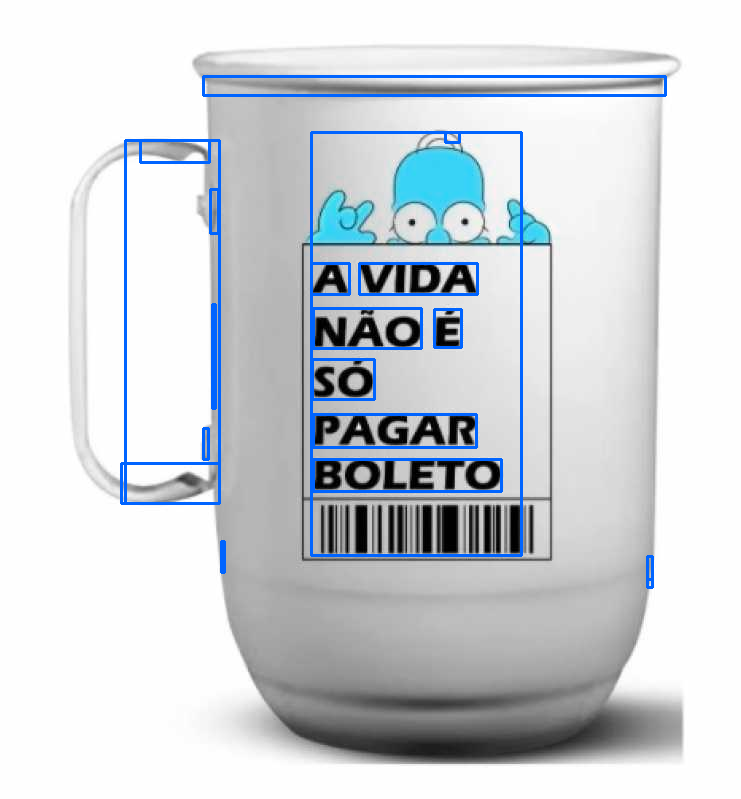

In [ ]:
img_copia = rgb_capa.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, rgb_capa = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

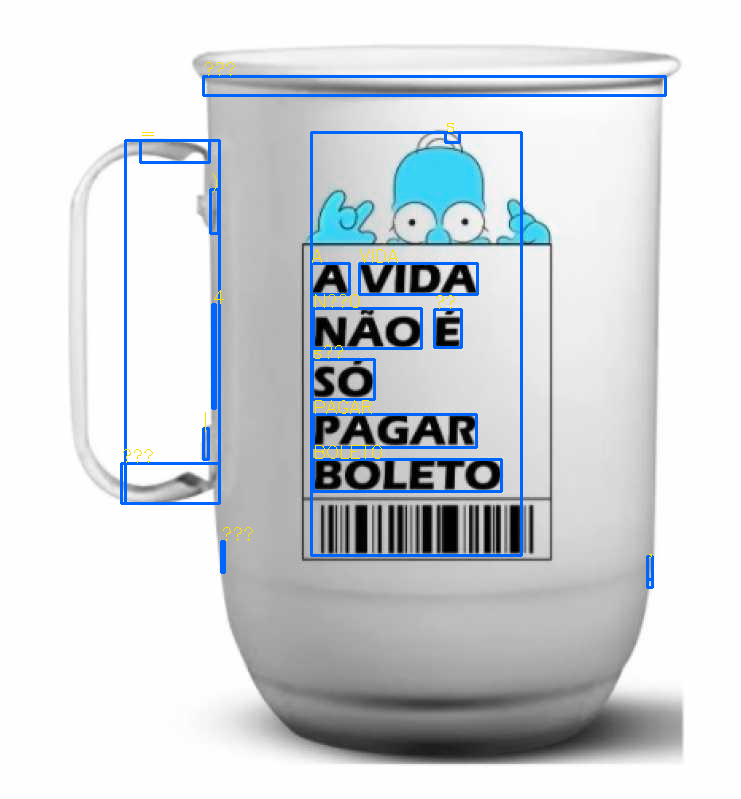

In [ ]:
img_copia = rgb_capa.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,225,255))

cv2_imshow(img_copia)